In [116]:
import os
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from do_mpc.data import load_results
import numpy as np
import pandas as pd

S = 50
K = 5

In [117]:
def extract_data(path):
    df = load_results(path)
    sim_data = df['simulator']
    mpc_data = df['mpc']
    mhe_data = df['estimator']

    # Extract data from do-mpc data structures
    _t = mhe_data['_time']
    x_est = mhe_data['_x', 'x']
    x_true = sim_data['_x', 'x']
    u = mhe_data['_u', 'u']
    u_optimal = mpc_data['_u', 'u']
    y_true = sim_data['_aux', 'y_meas']
    y_est = mhe_data['_aux', 'y_meas']

    return _t, x_est, x_true, u, u_optimal, y_true, y_est

In [118]:
class Entry():
    def __init__(self, datum):
        self.datum = datum

def array_to_class(data):
    entries = np.array([])
    for datum in data:
        entry = Entry(datum)
        entries = np.append(entries, entry)
    return entries

In [119]:
result_path = './benchmark_random/student_8.pkl'
frames = []
columns = ['x_est', 'x_true', 'u', 'u_optimal', 'y_true', 'y_est']
_t, x_est, x_true, u, u_optimal, y_true, y_est = extract_data(result_path)

Text(0.5, 1.0, '(c)')

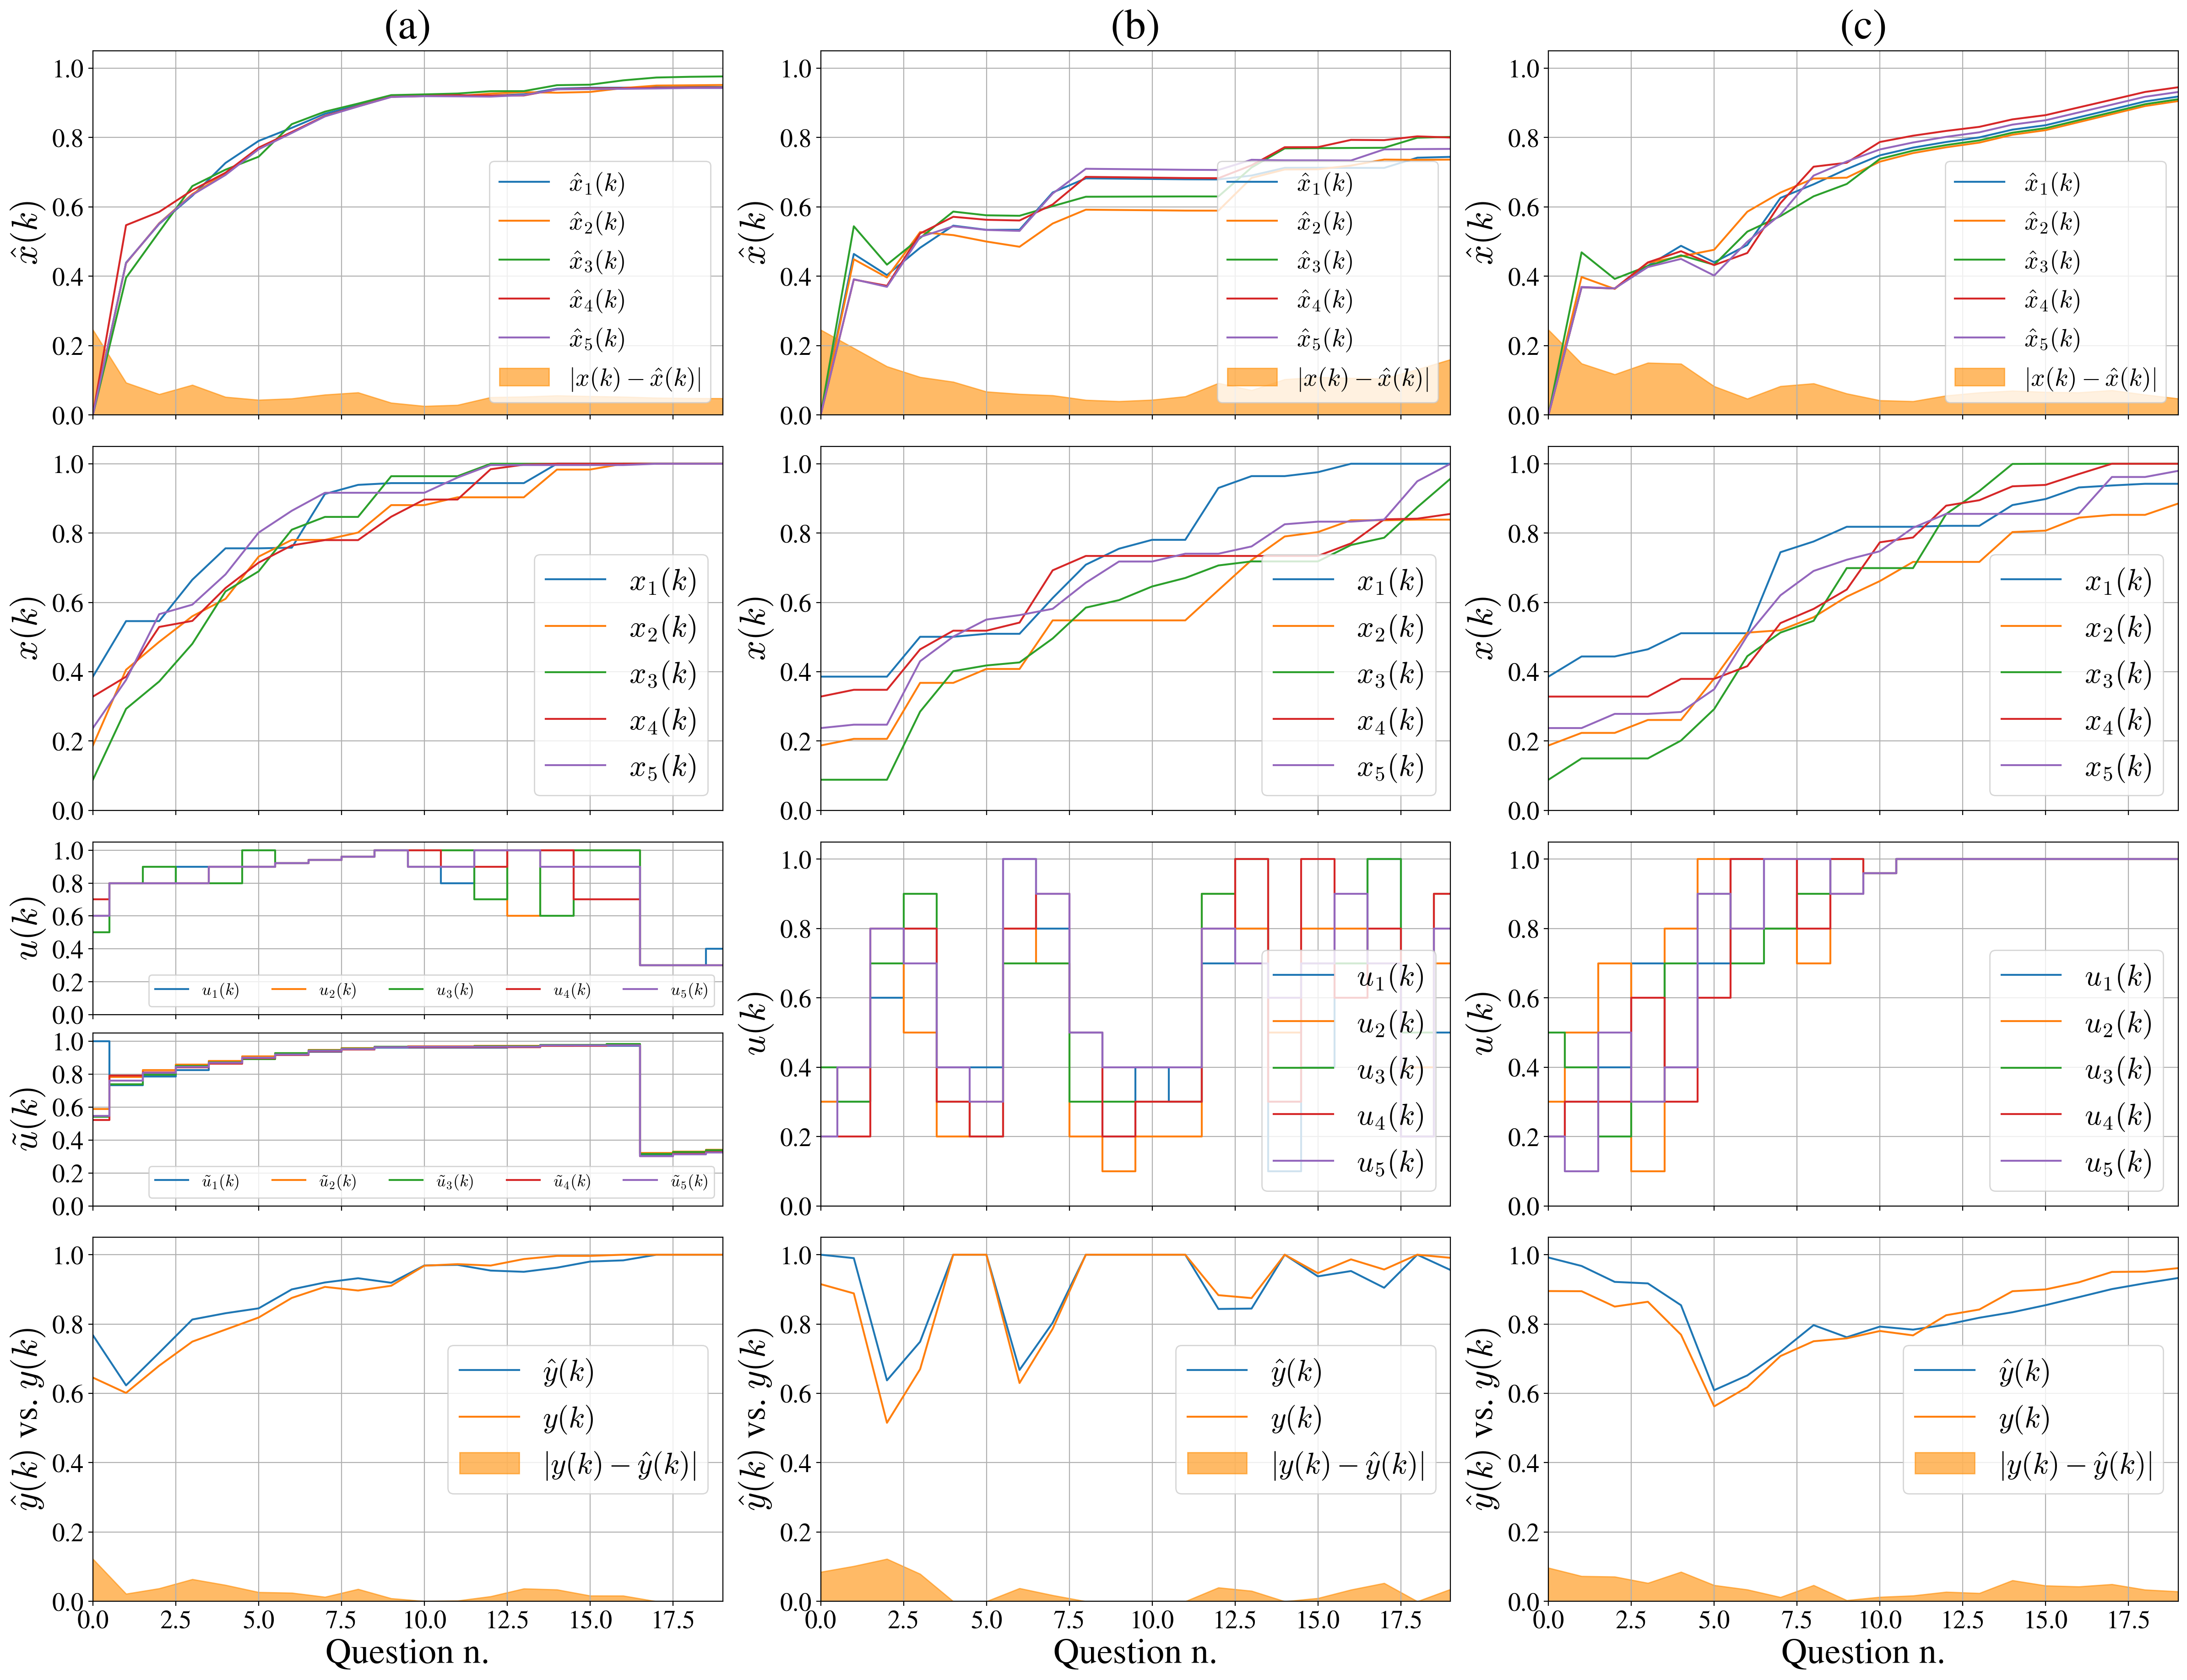

In [123]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 28
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.xmargin'] = 0
fig, ax = plt.subplots(4,3, figsize=(24,18), dpi=200, sharex='col', sharey='col')
for m, model in enumerate(['./mpc_mhe_model/student_8.pkl','./benchmark_random/student_8.pkl','./benchmark_increasing_difficulty/student_8.pkl']):
    result_path = model#'./benchmark_random/student_8.pkl'
    _t, x_est, x_true, u, u_optimal, y_true, y_est = extract_data(result_path)
    for i in range(K):
        ax[0][m].plot(x_est[:,i], label='$\hat{x}$'+f'$_%i(k)$'%(i+1))
    ax[0][m].fill_between(x=np.arange(len(x_est)), y1=np.zeros(len(x_est)), y2=np.mean(abs(x_est - x_true), axis=1), color='darkorange', alpha=0.6, label='$|x(k)-\hat{x}(k)|$')
    ax[0][m].set_ylim([0,1.05])
    ax[0][m].set_ylabel('$\hat{x}(k)$')
    ax[0][m].legend(loc='lower right', fontsize='x-small')
    for i in range(0,K):
        ax[1][m].plot(x_true[:,i], label='$x$'+f'$_%i(k)$'%(i+1))
    ax[1][m].set_ylabel('${x}(k)$')
    ax[1][m].legend(loc='lower right', fontsize='small')
    if m == 0:
        divider = make_axes_locatable(ax[2][m])
        axShallow = divider.append_axes("top", size="100%", pad=0.2, sharey=ax[2][m])
        axShallow.set_xticklabels([])
        for i in range(0,K):
            axShallow.plot(u[:,i], drawstyle='steps-mid', label='$u$'+f'$_%i(k)$'%(i+1))
        axShallow.set_ylabel('$u(k)$')
        axShallow.legend(loc='lower right', fontsize=13, ncol=K)
        for i in range(0,K):
            ax[2][m].plot(u_optimal[:,i], label=r'$\tilde{u}$'+f'$_%i(k)$'%(i+1), drawstyle='steps-mid')
        ax[2][m].legend(loc='lower right', fontsize=13, ncol=K)
        ax[2][m].set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
        ax[2][m].set_yticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
        ax[2][m].set_ylabel(r'$\tilde{u}(k)$')
    else:
        for i in range(0,K):
            ax[2][m].plot(u[:,i], label='$u$'+f'$_%i(k)$'%(i+1), drawstyle='steps-mid')
        ax[2][m].legend(loc='lower right', fontsize='small')
        ax[2][m].set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
        ax[2][m].set_yticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
        ax[2][m].set_ylabel('$u(k)$')
    ax[3][m].plot(y_est, label='$\hat{y}(k)$')
    ax[3][m].plot(y_true, label='$y(k)$')
    ax[3][m].fill_between(x=np.arange(len(y_est)), y1=np.zeros(len(y_est)), y2=np.mean(abs(y_est - y_true), axis=1), color='darkorange', alpha=0.6, label='$|y(k)-\hat{y}(k)|$')
    ax[3][m].legend(loc='right', fontsize='small')
    ax[3][m].set_ylim([0,1.05])
    ax[3][m].set_xlabel('Question n.')
    ax[3][m].set_ylabel('$\hat{y}(k)$ vs. $y(k)$')
    #ax[3][0].set_xticklabels([f'%.1f'%i for i in np.arange(0,20,2)])
    # if m==0:
    #ax[3][m].set_xticks(np.linspace(0,20,num=11))
    #     ax[0][m].set_xticklabels([f'%i'%i for i in np.linspace(0,20,num=11)])
fig.tight_layout(pad=0.4)
ax[0][0].set_title('(a)', pad=10)
ax[0][1].set_title('(b)', pad=10)
ax[0][2].set_title('(c)', pad=10)

In [81]:
np.arange(0,20,2.5)

array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5])

In [49]:
import pickle as pkl
with open("open_loop_random.pkl","wb") as file:
    pkl.dump(ax, file)

In [59]:
%matplotlib notebook
plt.show()

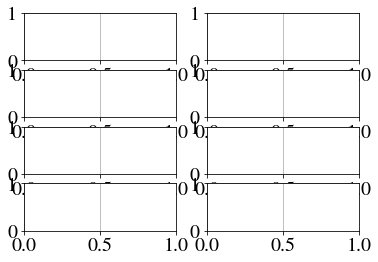

In [52]:
closed_loop = pkl.load(open('closed_loop.pkl','rb'))
open_loop_random = pkl.load(open('open_loop_random.pkl','rb'))
fig, ax = plt.subplots(4,2)
for i in range(4):
    ax[i][0] = closed_loop[i]

In [316]:
result_path = './benchmark_random/'
frames = []
columns = ['x_est', 'x_true', 'u', 'u_optimal', 'y_true', 'y_est']
for i in range(0,S):
    result_filename = f'student_%i.pkl'%i
    _t, x_est, x_true, u, u_optimal, y_true, y_est = extract_data(os.path.join(result_path, result_filename))
    #df_tmp = pd.DataFrame(data=np.array([x_est, x_true, u, u_optimal, y_true, y_est]), columns=columns, index=_t.flatten())
    df_tmp = pd.DataFrame({'x_est':array_to_class(x_est),
                            'x_true':array_to_class(x_true),
                            'u':array_to_class(u),
                            'u_optimal':array_to_class(u_optimal),
                            'y_true':array_to_class(y_true),
                            'y_est':array_to_class(y_est)})
    frames.append(df_tmp)

skill_0_df_random = pd.DataFrame()
skill_end_df_random = pd.DataFrame()
for k in range(K):
    skill_0_vect = np.array([])
    skill_end_vect = np.array([])
    for frame in frames:
        skill_0_vect = np.append(skill_0_vect, frame['x_true'].iloc[0].datum[k])
        skill_end_vect = np.append(skill_end_vect, frame['x_true'].iloc[-5].datum[k])
    skill_0_df_random[f'skill_%i'%k] = skill_0_vect
    skill_end_df_random[f'skill_%i'%k] = skill_end_vect 

skill_0_random = np.zeros((20,S))
for i, frame in enumerate(frames): # every student
    for j, x in enumerate(frame['x_true']):
        skill_0_random[j,i] = x.datum.mean()

In [317]:
result_path = './benchmark_increasing_difficulty/'
frames = []
columns = ['x_est', 'x_true', 'u', 'u_optimal', 'y_true', 'y_est']
for i in range(0,S):
    result_filename = f'student_%i.pkl'%i
    _t, x_est, x_true, u, u_optimal, y_true, y_est = extract_data(os.path.join(result_path, result_filename))
    #df_tmp = pd.DataFrame(data=np.array([x_est, x_true, u, u_optimal, y_true, y_est]), columns=columns, index=_t.flatten())
    df_tmp = pd.DataFrame({'x_est':array_to_class(x_est),
                            'x_true':array_to_class(x_true),
                            'u':array_to_class(u),
                            'u_optimal':array_to_class(u_optimal),
                            'y_true':array_to_class(y_true),
                            'y_est':array_to_class(y_est)})
    frames.append(df_tmp)

skill_0_df_increasing_diff = pd.DataFrame()
skill_end_df_increasing_diff = pd.DataFrame()
for k in range(K):
    skill_0_vect = np.array([])
    skill_end_vect = np.array([])
    for frame in frames:
        skill_0_vect = np.append(skill_0_vect, frame['x_true'].iloc[0].datum[k])
        skill_end_vect = np.append(skill_end_vect, frame['x_true'].iloc[-1].datum[k])
    skill_0_df_increasing_diff[f'skill_%i'%k] = skill_0_vect
    skill_end_df_increasing_diff[f'skill_%i'%k] = skill_end_vect 

skill_0_increasing_diff = np.zeros((20,S))
for i, frame in enumerate(frames): # every student
    for j, x in enumerate(frame['x_true']):
        skill_0_increasing_diff[j,i] = x.datum.mean()

In [318]:
columns = [f'student_%i'%i for i in range(S)]
skill_0_model_df = pd.DataFrame(skill_0_model, columns=columns)

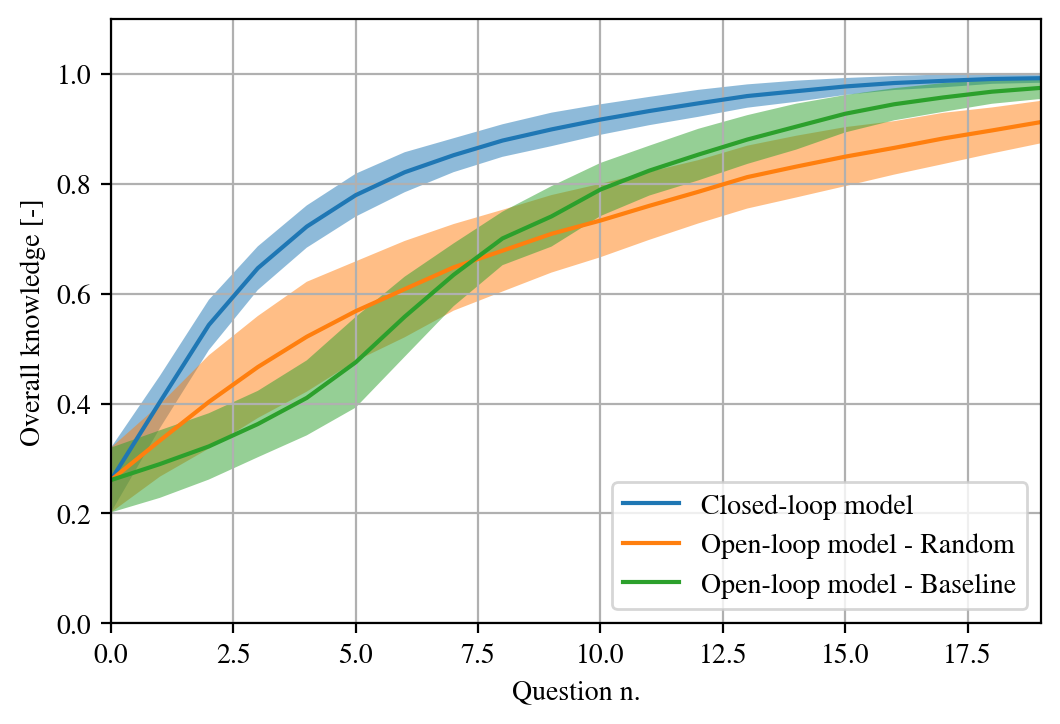

In [326]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
fig = plt.figure(dpi=200)
plt.plot(np.arange(len(skill_0_model.mean(axis=1))), skill_0_model.mean(axis=1), label='Closed-loop model')
plt.fill_between(np.arange(len(skill_0_model.mean(axis=1))), skill_0_model.mean(axis=1)-skill_0_model.std(axis=1), skill_0_model.mean(axis=1)+skill_0_model.std(axis=1), alpha=0.5)
plt.plot(np.arange(len(skill_0_random.mean(axis=1))), skill_0_random.mean(axis=1), label='Open-loop model - Random')
plt.fill_between(np.arange(len(skill_0_random.mean(axis=1))), skill_0_random.mean(axis=1)-skill_0_random.std(axis=1), skill_0_random.mean(axis=1)+skill_0_random.std(axis=1), alpha=0.5)
plt.plot(np.arange(len(skill_0_increasing_diff.mean(axis=1))), skill_0_increasing_diff.mean(axis=1), label='Open-loop model - Baseline')
plt.fill_between(np.arange(len(skill_0_increasing_diff.mean(axis=1))), skill_0_increasing_diff.mean(axis=1)-skill_0_increasing_diff.std(axis=1), skill_0_increasing_diff.mean(axis=1)+skill_0_increasing_diff.std(axis=1), alpha=0.5)
plt.legend(loc='lower right')
#plt.title('Average knowledge of the class - Comparison')
plt.xlabel('Question n.')
plt.ylabel('Overall knowledge [-]')
plt.ylim([0, 1.1])
plt.margins(x=0)
plt.grid(True)
# plt.plot(skill_0_random.mean(axis=1))
# plt.plot(skill_0_increasing_diff.mean(axis=1))

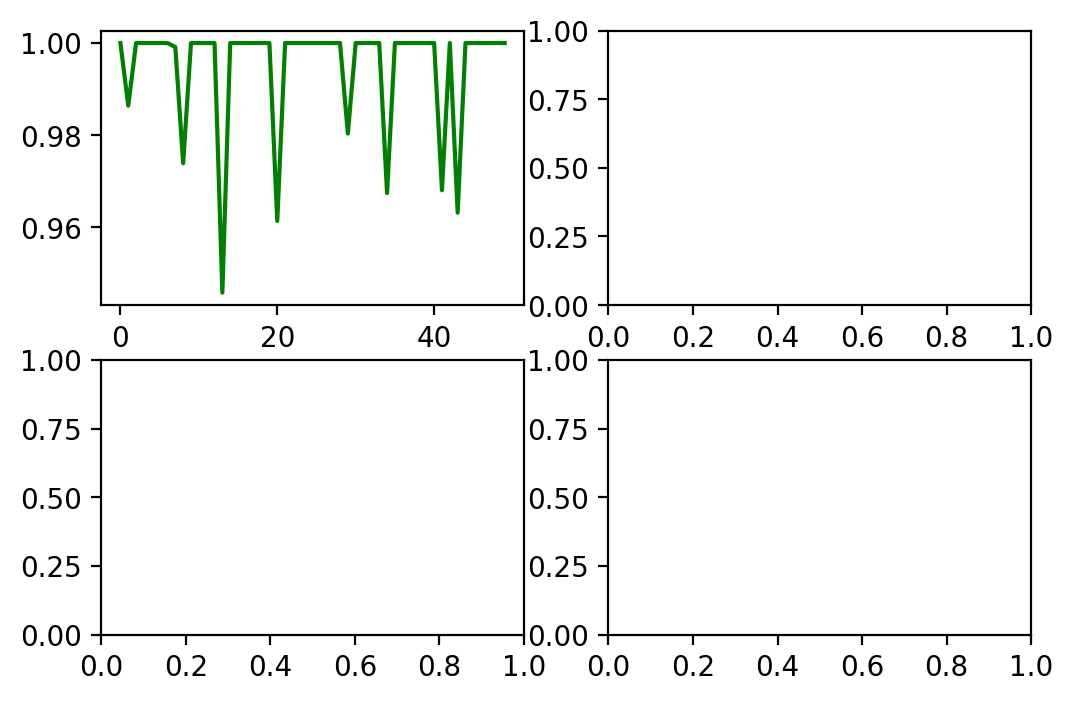

In [182]:
fig, ax = plt.subplots(2,2,dpi=200)
#sns.countplot(skill_end_df_random['skill_1'], ax=ax[0][0])
ax.lineplot(skill_end_df_increasing_diff['skill_1'], ax=ax[0][0], color='green')
# sns.violinplot(skill_end_df_model['skill_1'], ax=ax[0][0])

<AxesSubplot:>

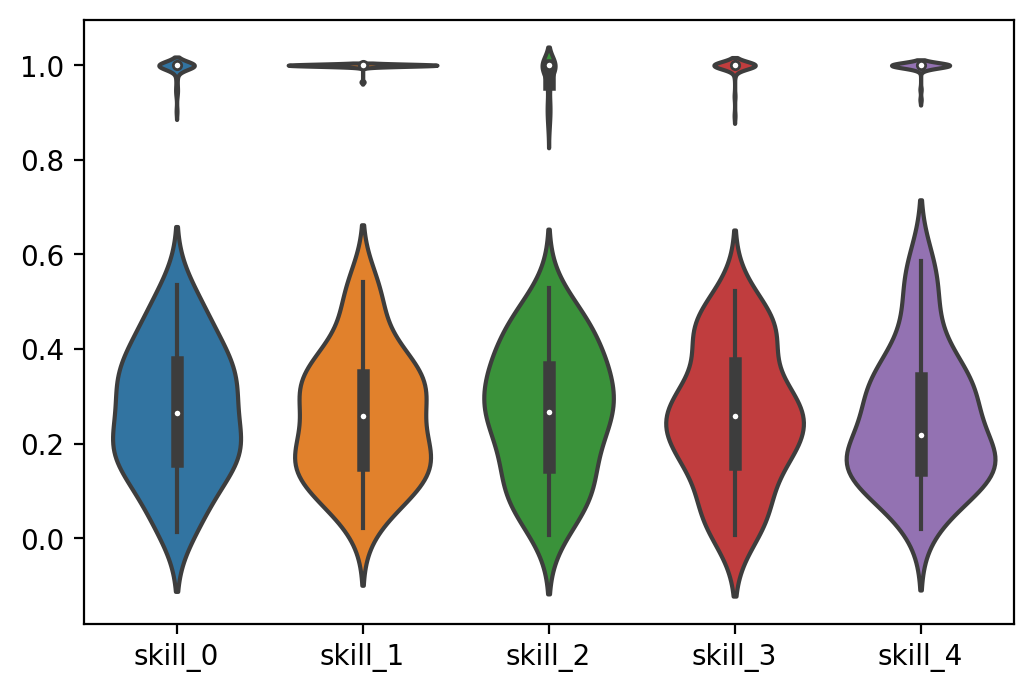

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(dpi=200)
sns.violinplot(data=skill_0_df_model)
sns.violinplot(data=skill_end_df_model)
#sns.violinplot(data=skill_end_df_increasing_diff)
# sns.displot(skill_end_df_model, x='skill_0', kind='kde')
# sns.displot(skill_end_df_random, x='skill_0', kind='kde')